In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)


In [14]:
df= pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')

df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [15]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
from sklearn.preprocessing import StandardScaler as standardscaler
StandardScaler = standardscaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)

In [30]:
# SVM Model
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 1)
classifier.fit(X_train, y_train)

SVC(gamma=1, random_state=0)

In [19]:
y_predict = classifier.predict(X_test)

In [27]:
# color = ["black" if c == 0 else "lightgrey" for c in classifier]
# plt.scatter(X_train[:,0], X_train[:,1])
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for svm = 0.9012605042016807
Accuracy for test set for svm = 0.8445378151260504


In [35]:
# Naive Bayes
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [37]:
from sklearn.preprocessing import StandardScaler as standardscaler
StandardScaler = standardscaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)

In [38]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model = classifier.fit(X_train, y_train)

In [39]:
y_predict = classifier.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for Naive Bayes = 0.5252100840336135
Accuracy for test set for Naive Bayes = 0.8529411764705882


In [48]:
# Logistic Regression
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
StandardScaler = standardscaler()
X_train = StandardScaler.fit_transform(X_train)
X_test = StandardScaler.transform(X_test)

In [51]:
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")

In [52]:
model = logistic_regression.fit(X_train, y_train)

C:\Users\Sir Cocoa of ButteR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.5252100840336135
Accuracy for test set for Logistic Regression = 0.8529411764705882


In [56]:
# Decision Tree
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
y_predict = classifier.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision tree = 1.0
Accuracy for test set for Decision tree = 0.8781512605042017


In [66]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree

In [68]:
dot_data = tree.export_graphviz(classifier,
                               out_file=None,
                               feature_names=X_train,
                               class_names=y_train)

ValueError: Length of feature_names, 952 does not match number of features, 11

In [69]:
graph = pydotplus.graph_from_dot_data(dot_data)

NameError: name 'dot_data' is not defined

In [70]:
Image(graph.create_png())

NameError: name 'graph' is not defined

In [76]:
# Random Forest
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [83]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
classifier = RandomForestClassifier(criterion="entropy", n_estimators = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [84]:
y_pred = classifier.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_predict, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Random Forest = 0.9926470588235294
Accuracy for test set for Random Forest = 0.8781512605042017


In [87]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train[i] for i in indices]
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

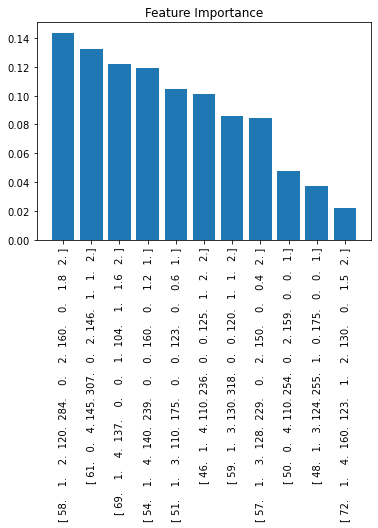

In [88]:
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()